In [137]:
!pip install scikit-plot

In [5]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
train_df = pd.read_csv('https://github.com/dsrscientist/bigdatamart_rep/raw/master/bigdatamart_Train.csv')

In [7]:
#which data columns are present in the trainset
print(train_df.columns.values)

['Item_Identifier' 'Item_Weight' 'Item_Fat_Content' 'Item_Visibility'
 'Item_Type' 'Item_MRP' 'Outlet_Identifier' 'Outlet_Establishment_Year'
 'Outlet_Size' 'Outlet_Location_Type' 'Outlet_Type' 'Item_Outlet_Sales']


In [8]:
# to check which columns are categorical and which are continous
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# there is missing value in the Item_Weight and Outlet_size in both train and test dataset

train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

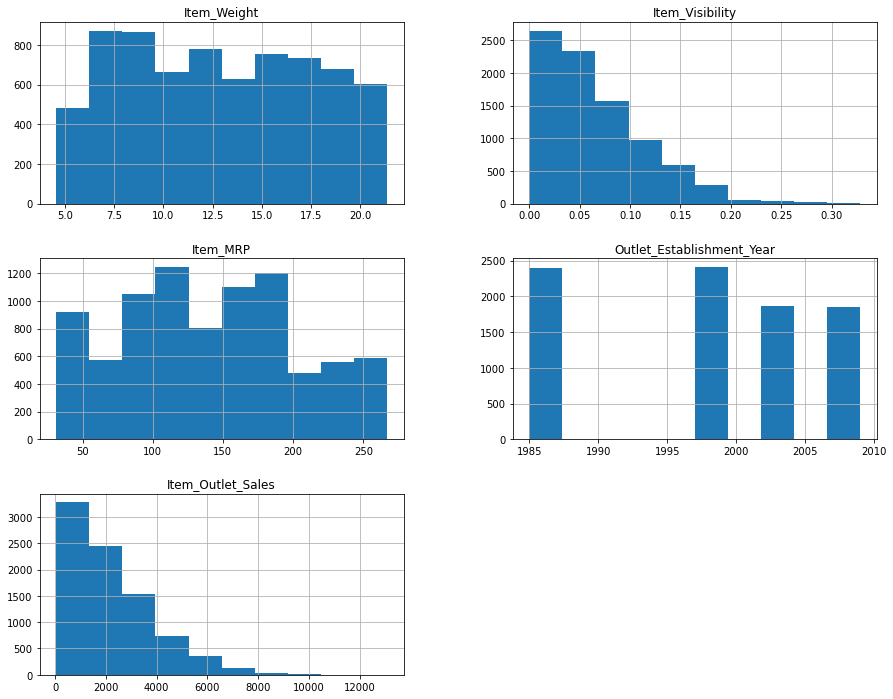

In [13]:
train_df.hist(figsize=(15,12))

In [14]:
corr_matrix=train_df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

*** highest correlation is with the Item_MRP with the Item_Outlet_sales

### Now We Will make every column feature relationship  with the target column(Vector)

In [15]:
train_df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDO19     9
FDU12     9
NCF42     9
         ..
FDY43     1
FDK57     1
FDN52     1
FDC23     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
train_df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
train_df.Item_Fat_Content=train_df.Item_Fat_Content.replace('LF','Low Fat')

In [18]:
train_df.Item_Fat_Content=train_df.Item_Fat_Content.replace('reg','Regular')
train_df.Item_Fat_Content=train_df.Item_Fat_Content.replace('low fat','Low Fat')

In [19]:
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

1.Further in data processing convert all the dataset into one form

In [20]:
train_df.Item_Identifier=train_df.Item_Identifier.astype('category')
train_df.Item_Fat_Content=train_df.Item_Fat_Content.astype('category')
train_df.Item_Type=train_df.Item_Type.astype('category')
train_df.Outlet_Identifier=train_df.Outlet_Identifier.astype('category')
train_df.Outlet_Establishment_Year=train_df.Outlet_Establishment_Year.astype('int64')

train_df.Outlet_Type=train_df.Outlet_Type.astype('category')
train_df.Outlet_Location_Type=train_df.Outlet_Location_Type.astype('category')
train_df.Outlet_Size=train_df.Outlet_Size.astype('category')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

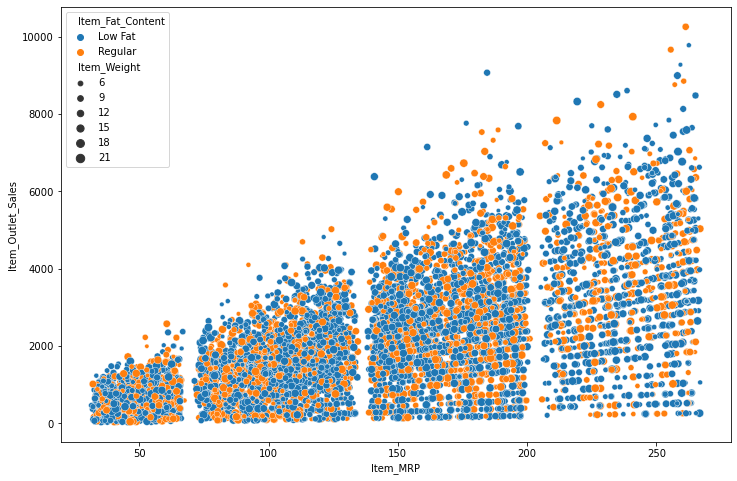

In [21]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=train_df)

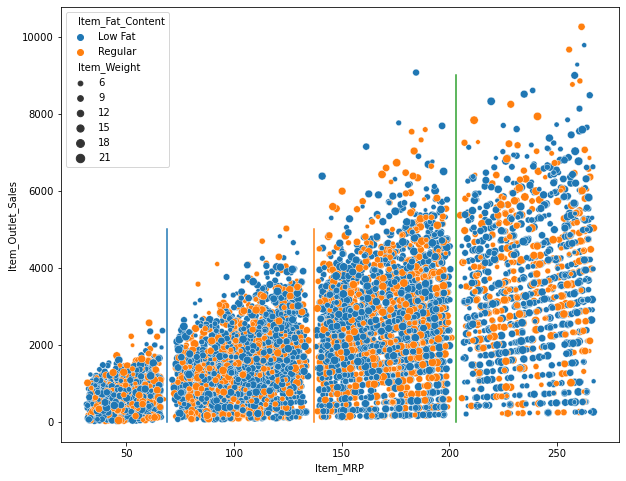

In [22]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=train_df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

In [23]:
train_df.Item_MRP=pd.cut(train_df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

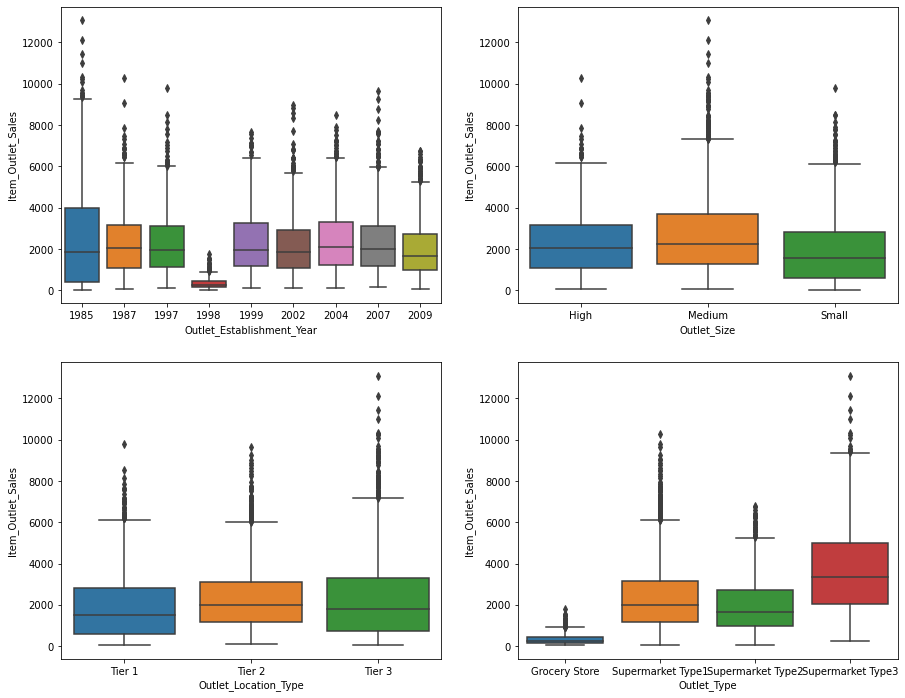

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train_df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train_df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train_df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train_df)

*** "Item_Visibility" and "Item_Weight" have low correlation strength so we will drop both the column

In [25]:
train_attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type',
            'Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

In [26]:
train=train_df[train_attributes]

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   category
 2   Outlet_Location_Type       8523 non-null   category
 3   Outlet_Size                6113 non-null   category
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   category
 6   Item_Type                  8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

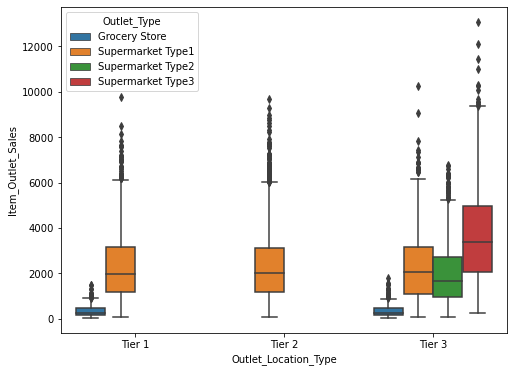

In [28]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=train)

In [29]:
train[train.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


In [30]:
train.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [31]:
train.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
...,...,...,...,...,...,...,...,...
8473,c,Grocery Store,Tier 3,NaN,1998,OUT010,Hard Drinks,431.4384
8480,c,Grocery Store,Tier 1,Small,1985,OUT019,Snack Foods,459.4020
8486,a,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,45.2744
8490,c,Grocery Store,Tier 1,Small,1985,OUT019,Fruits and Vegetables,487.3656


In [32]:
train.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [33]:
(train.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [34]:
train.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [35]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [36]:
train.Outlet_Size=train.apply(func,axis=1)

C:\jpytr notebook\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
train.Outlet_Size=train.Outlet_Size.astype('category')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   category
 2   Outlet_Location_Type       8523 non-null   category
 3   Outlet_Size                8523 non-null   category
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   category
 6   Item_Type                  8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


### now lets check outliers

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

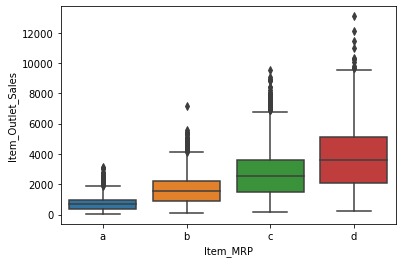

In [39]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

In [40]:
train[train.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [41]:
train[train.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [42]:
train=train.drop(index=7796)
train.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

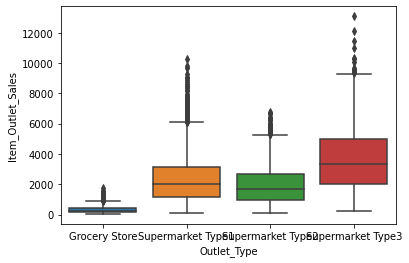

In [43]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

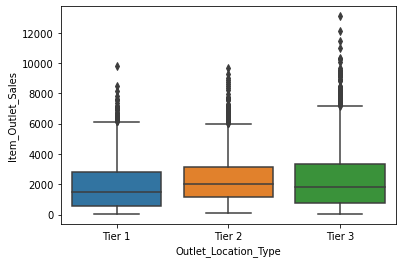

In [44]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)

In [45]:
train[train.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [46]:
train[train['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [47]:
train=train.drop(index=4289)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

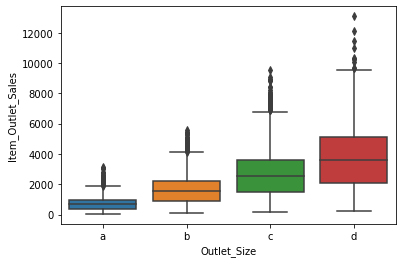

In [48]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

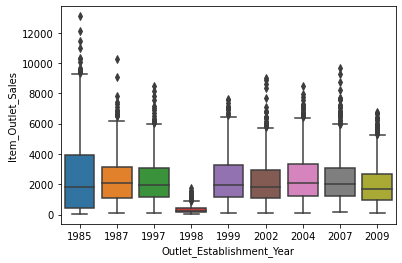

In [49]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)

In [50]:
train.Outlet_Establishment_Year=train.Outlet_Establishment_Year.astype('category')

In [51]:
train

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052
...,...,...,...,...,...,...,...,...
8518,d,Supermarket Type1,Tier 3,d,1987,OUT013,Snack Foods,2778.3834
8519,b,Supermarket Type1,Tier 2,b,2002,OUT045,Baking Goods,549.2850
8520,b,Supermarket Type1,Tier 2,b,2004,OUT035,Health and Hygiene,1193.1136
8521,b,Supermarket Type2,Tier 3,b,2009,OUT018,Snack Foods,1845.5976


### splitting the train data

In [52]:
data_label=train.Item_Outlet_Sales
data_dummy=pd.get_dummies(train.iloc[:,0:6])

In [53]:
data_dummy['Item_Outlet_Sales']=data_label

In [54]:
data_dummy.shape

(8521, 35)

In [55]:
data_dummy

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2778.3834
8519,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,549.2850
8520,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1193.1136
8521,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1845.5976


In [56]:
X=data_dummy.drop(columns='Item_Outlet_Sales')
Y=data_dummy['Item_Outlet_Sales']

In [57]:
X

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8521, dtype: float64

### Using a Machine Learning Model

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [90]:
#train.shape , test.shape

In [91]:
#train_label=train['Item_Outlet_Sales']
#test_label=test['Item_Outlet_Sales']
#del train['Item_Outlet_Sales']
#del test['Item_Outlet_Sales']

In [92]:
#test_label

In [131]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
Y_pred_train = lr.predict(X_train)

In [95]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, Y_pred_train))

Coefficients: [ 3.28638862e+16  6.02043288e+15 -1.59661933e+16  2.71379495e+15
  3.23369333e+15 -1.53520580e+16 -1.45746250e+16 -1.21412948e+16
 -4.04150446e+16  2.96033021e+16 -8.09601150e+12 -1.41908787e+16
  1.26525746e+16  3.46392008e+16  1.59592126e+16 -8.18117069e+14
 -2.20233975e+15  3.51546212e+16 -9.24568492e+15  1.41179448e+16
 -1.71699301e+16 -5.61971622e+16  4.99126886e+16 -3.41525746e+14
 -9.24568492e+15  2.29672126e+15 -7.94297052e+16 -3.41525746e+14
  2.27336958e+16 -2.29826460e+15  2.66801455e+16 -1.23470865e+16
  5.34670892e+15  2.63833853e+16]
Intercept: -3407235020020369.0
Mean squared error (MSE): 1307443.61
Coefficient of determination (R^2): 0.54


In [96]:
Y_pred_test = lr.predict(X_test)

In [97]:
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, Y_pred_test))

Coefficients: [ 3.28638862e+16  6.02043288e+15 -1.59661933e+16  2.71379495e+15
  3.23369333e+15 -1.53520580e+16 -1.45746250e+16 -1.21412948e+16
 -4.04150446e+16  2.96033021e+16 -8.09601150e+12 -1.41908787e+16
  1.26525746e+16  3.46392008e+16  1.59592126e+16 -8.18117069e+14
 -2.20233975e+15  3.51546212e+16 -9.24568492e+15  1.41179448e+16
 -1.71699301e+16 -5.61971622e+16  4.99126886e+16 -3.41525746e+14
 -9.24568492e+15  2.29672126e+15 -7.94297052e+16 -3.41525746e+14
  2.27336958e+16 -2.29826460e+15  2.66801455e+16 -1.23470865e+16
  5.34670892e+15  2.63833853e+16]
Intercept: -3407235020020369.0
Mean squared error (MSE): 1391709.05
Coefficient of determination (R^2): 0.55


In [98]:
from sklearn.linear_model import  Ridge,RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(X_train,y_train)
ridgecv.alpha_
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)


0.5540199878728846

In [99]:
predict_rcv=ridgecv.predict(X_test)

In [100]:
print('Coefficients:', ridgecv.coef_)
print('Intercept:', ridgecv.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_rcv))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_rcv))

Coefficients: [-704.68823304 -274.94506488  241.17089785  738.46240007 -952.68746322
  294.92772807  -33.18267301  690.94240816 -239.52197144   56.98188837
  182.54008307 -704.68823304 -274.94506488  241.17089785  738.46240007
  134.81049233  -78.66410469  128.50515168 -396.55554739  188.10479271
  -36.73367913   52.07628051   41.63928699  -33.18267301 -396.55554739
  -78.66410469   41.63928699  -33.18267301 -556.13191583  690.94240816
   52.07628051  -36.73367913  128.50515168  188.10479271]
Intercept: 1914.1893126589687
Mean squared error (MSE): 1386146.58
Coefficient of determination (R^2): 0.55


In [101]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train,y_train)
predict_r=r.predict(X_test)
r.score(X_test,y_test)

0.5540484105349376

In [102]:
print('Coefficients:', r.coef_)
print('Intercept:', r.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_r))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_r))

Coefficients: [-705.01698562 -275.00884494  241.22789728  738.79793327 -953.29291994
  295.09157575  -33.20390913  691.40525338 -239.6632355    56.97559226
  182.68764319 -705.01698562 -275.00884494  241.22789728  738.79793327
  134.81312308  -78.8129114   128.64427095 -396.70078962  188.28462387
  -36.78011757   52.09304595   41.66266391  -33.20390913 -396.70078962
  -78.8129114    41.66266391  -33.20390913 -556.59213029  691.40525338
   52.09304595  -36.78011757  128.64427095  188.28462387]
Intercept: 1914.0522378531455
Mean squared error (MSE): 1386058.24
Coefficient of determination (R^2): 0.55


In [103]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(X_train,y_train)
predict_l=l.predict(X_test)
l.score(X_test,y_test)

C:\jpytr notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897554108.9546862, tolerance: 1810734.883300815
  model = cd_fast.enet_coordinate_descent(


0.5540459879738425

In [104]:
print('Coefficients:', l.coef_)
print('Intercept:', l.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_l))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_l))

Coefficients: [-1.67421331e+03 -1.17732129e+03 -2.07650713e+02  8.29466261e+02
 -2.17456334e+03 -3.45710923e+02 -5.82715874e+02  1.00314299e+03
 -3.90762723e+00  6.73576818e+01  0.00000000e+00 -3.74908912e+02
 -1.17700430e+01  5.09762246e+01  8.99525416e+00  0.00000000e+00
 -0.00000000e+00 -3.43975237e+00 -5.42197812e+01  1.09346343e+02
 -1.07990984e+02  6.39400356e+01  4.77403791e+01 -0.00000000e+00
 -9.84176895e-01 -0.00000000e+00  4.93080062e-02 -0.00000000e+00
 -1.02031516e+02  3.12696837e+01  4.72299958e+00 -9.10647120e-01
 -0.00000000e+00  6.33905016e+00]
Intercept: 3219.010372267586
Mean squared error (MSE): 1386065.77
Coefficient of determination (R^2): 0.55


In [105]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(X_train,y_train)
predict_svm=svm.predict(X_test)
svm.score(X_test,y_test)

0.3768097892991221

In [106]:
print('Coefficients:', svm.coef_)
print('Intercept:', svm.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_svm))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_svm))

Coefficients: [[-4.11184390e+02 -1.60446830e+02  2.10736670e+02  3.60894550e+02
  -5.06858657e+02  1.98793583e+02  6.50739288e-02  3.08000000e+02
  -1.28958827e+02  6.20000000e+01  6.69588267e+01 -4.11184390e+02
  -1.60446830e+02  2.10736670e+02  3.60894550e+02  5.11413432e+01
   8.89375277e+00  5.16742673e+01 -2.50000000e+02  7.62255628e+01
   3.00000000e+00  2.90000000e+01  3.00000000e+01  6.50739288e-02
  -2.50000000e+02  8.89375277e+00  3.00000000e+01  6.50739288e-02
  -2.56858657e+02  3.08000000e+02  2.90000000e+01  3.00000000e+00
   5.16742673e+01  7.62255628e+01]]
Intercept: [1686.8541188]
Mean squared error (MSE): 1936932.06
Coefficient of determination (R^2): 0.38


In [107]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predict_dt=dtr.predict(X_test)
dtr.score(X_test,y_test)

0.5974913688697108

In [108]:

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_dt))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_dt))

Mean squared error (MSE): 1251033.56
Coefficient of determination (R^2): 0.60


In [109]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
predict_rf=rf.predict(X_test)
rf.score(X_test,y_test)

0.5974324027221757

In [110]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_rf))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_rf))

Mean squared error (MSE): 1251216.84
Coefficient of determination (R^2): 0.60


In [111]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
predict_ada=ada.predict(X_test)
ada.score(X_test,y_test)

0.5292953284065989

In [112]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_ada))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_ada))

Mean squared error (MSE): 1462993.08
Coefficient of determination (R^2): 0.53


In [113]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predict_gbr=gbr.predict(X_test)
gbr.score(X_test,y_test)

0.597618953150238

In [114]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predict_gbr))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predict_gbr))

Mean squared error (MSE): 1250637.02
Coefficient of determination (R^2): 0.60


### cross-Validation of the train dataset

In [115]:
cross_lr=cross_val_score(lr,X,Y,cv=5)

#now i will take the mean of it

cross_lr=cross_val_score(lr,X,Y,cv=5).mean()
cross_lr

0.5408355946945684

In [116]:
cross_rcv=cross_val_score(ridgecv,X,Y,cv=5)

#now i will take the mean of it

cross_rcv=cross_val_score(ridgecv,X,Y,cv=5).mean()
cross_rcv

0.541581640010441

In [117]:
cross_r=cross_val_score(r,X,Y,cv=5)

#now i will take the mean of it

cross_r=cross_val_score(r,X,Y,cv=5).mean()
cross_r

0.5415797135340563

In [118]:
cross_l=cross_val_score(l,X,Y,cv=5)

#now i will take the mean of it

cross_l=cross_val_score(l,X,Y,cv=5).mean()
cross_l

C:\jpytr notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 957666764.8047895, tolerance: 1946590.7423349908
  model = cd_fast.enet_coordinate_descent(
C:\jpytr notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947574131.8431368, tolerance: 1993508.5035140824
  model = cd_fast.enet_coordinate_descent(
C:\jpytr notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977026813.6472921, tolerance: 2012783.2125505402
  model = cd_fast.enet_coordinate_descent(
C:\jpytr notebook\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not conv

0.5415801530117463

In [119]:
cross_svm=cross_val_score(svm,X,Y,cv=5)

#now i will take the mean of it

cross_svm=cross_val_score(svm,X,Y,cv=5).mean()
cross_svm

0.39638727966639414

In [120]:
cross_dtr=cross_val_score(dtr,X,Y,cv=5)

#now i will take the mean of it

cross_dtr=cross_val_score(dtr,X,Y,cv=5).mean()
cross_dtr

0.5799506739005518

In [121]:
cross_rf=cross_val_score(rf,X,Y,cv=5)

#now i will take the mean of it

cross_rf=cross_val_score(rf,X,Y,cv=5).mean()
cross_rf

0.5798756504679189

In [122]:
cross_ada=cross_val_score(ada,X,Y,cv=5)

#now i will take the mean of it

cross_ada=cross_val_score(ada,X,Y,cv=5).mean()
cross_ada

0.5116021859519314

In [124]:
cross_gbr=cross_val_score(gbr,X,Y,cv=5)

#now i will take the mean of it

cross_gbr=cross_val_score(gbr,X,Y,cv=5).mean()
cross_gbr

0.5805396056859123

### build DataFrames

In [125]:
name=['Linear Regression','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'SVM','Decision Tree Regression','Random Forest','Ada Boost','Gradient Boost']

In [129]:

score=pd.DataFrame({'CVC':[cross_lr,cross_r,cross_rcv,cross_l,cross_svm,cross_dtr,cross_rf,
                     cross_ada,cross_gbr]},index=name)
score.sort_values(by='CVC', ascending=False)

,CVC
Gradient Boost,0.580540
Decision Tree Regression,0.579951
Random Forest,0.579876
Ridge Regression CV,0.541582
Lasso Regression,0.541580
Ridge Regression,0.541580
Linear Regression,0.540836
Ada Boost,0.511602
SVM,0.396387


### from the above table we can see that "Gradient Boost" is much better

### Hyperparameter tunning

In [134]:
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gbr,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7,
                                                 n_estimators=200),
             param_grid=[{'max_features': [8, 10, 15, 18],
                          'max_leaf_nodes': [3, 5, 7, 9],
                          'min_samples_split': [5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [135]:
best_model=gs.best_estimator_
best_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=18,
                          max_leaf_nodes=9, min_samples_split=13,
                          n_estimators=200)

In [136]:
modgb=GradientBoostingRegressor()
modgb=GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=18,
                          max_leaf_nodes=9, min_samples_split=13,
                          n_estimators=200)
modgb.fit(X_train,y_train)
pred=modgb.predict(X_test)
print(r2_score(y_test,pred))

0.5738356600225668


### Testing Importing

In [139]:
test_df = pd.read_csv('https://github.com/dsrscientist/bigdatamart_rep/raw/master/bigdatamart_Test.csv')

In [140]:
test_df.shape

(5681, 11)

In [141]:
attributes=['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [142]:
test_df=test_df[attributes]

In [143]:
test_df.shape

(5681, 7)

In [144]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_MRP                   5681 non-null   float64
 1   Outlet_Type                5681 non-null   object 
 2   Outlet_Size                4075 non-null   object 
 3   Outlet_Location_Type       5681 non-null   object 
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Identifier          5681 non-null   object 
 6   Item_Type                  5681 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [145]:
test_df.Item_MRP=pd.cut(test_df.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)
test_df.Item_Type=test_df.Item_Type.astype('category')
test_df.Outlet_Size=test_df.Outlet_Size.astype('category')
test_df.Outlet_Identifier=test_df.Outlet_Identifier.astype('category')
test_df.Outlet_Establishment_Year=test_df.Outlet_Establishment_Year.astype('int64')
test_df.Outlet_Type=test_df.Outlet_Type.astype('category')
test_df.Outlet_Location_Type=test_df.Outlet_Location_Type.astype('category')

In [146]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   5681 non-null   category
 1   Outlet_Type                5681 non-null   category
 2   Outlet_Size                4075 non-null   category
 3   Outlet_Location_Type       5681 non-null   category
 4   Outlet_Establishment_Year  5681 non-null   int64   
 5   Outlet_Identifier          5681 non-null   category
 6   Item_Type                  5681 non-null   category
dtypes: category(6), int64(1)
memory usage: 79.5 KB


In [147]:
test_df.Outlet_Establishment_Year=test_df.Outlet_Establishment_Year.astype('category')

In [148]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   5681 non-null   category
 1   Outlet_Type                5681 non-null   category
 2   Outlet_Size                4075 non-null   category
 3   Outlet_Location_Type       5681 non-null   category
 4   Outlet_Establishment_Year  5681 non-null   category
 5   Outlet_Identifier          5681 non-null   category
 6   Item_Type                  5681 non-null   category
dtypes: category(7)
memory usage: 41.1 KB


In [149]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [150]:
test_df.Outlet_Size=test_df.apply(func,axis=1)

In [151]:
test_dummy=pd.get_dummies(test_df.iloc[:,0:6])

In [152]:
test_dummy.head()

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_a,Outlet_Size_b,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [154]:
gbr.fit(X_train,y_train)
predict=gbr.predict(test_dummy)

In [155]:
predict.shape

(5681,)

In [161]:
print(predict)

[1762.80069282 2223.61356604  809.51272496 ... 2084.11171005 2820.84482974
 2084.11171005]


In [162]:
test_dummy['Outlet_sales']=predict
test_dummy

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_a,Outlet_Size_b,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_sales
0,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1762.800693
1,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,2223.613566
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,809.512725
3,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2716.518302
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,5327.941044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2030.157374
5677,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,2479.721211
5678,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2084.111710
5679,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2820.844830


### Saving The Model

In [163]:
import joblib
joblib.dump(modgb,"BigDataMart.pkl")

['BigDataMart.pkl']